# <p align="center">Depression detection in Sinhala-English code-mixed text</p>
------------

## Importing necessary packages

In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset and Pre-processing

In [4]:
#Importing the dataset
data = pd.read_csv('Singlish_data_New.csv')
data.head()

,text,label
0,nati bari kam aga higa kam mada jeewath wenawa...,1
1,oba samata suba dawasak wewa,0
2,hamadema athaharala giyanam hari wage,1
3,raata dilisena luminious paata tharu tikak kaa...,0
4,mata manasika gataluwak thiyenawa. katha krnna...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1166 non-null   object
 1   label   1166 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


Getting the stop words list from the text file

In [6]:
NLTK_stop_words_list=stopwords.words('english')

with open("stop_words.txt") as f:
    content_list = f.readlines()

# remove new line characters
stop_words = [x.strip() for x in content_list]
final_stop_words = NLTK_stop_words_list + stop_words
print(final_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#creating a function to pre-process the Singlish text
def data_processing(text):

    # removal of capitalization
    text = text.lower()
    # remove numbers
    text = re.sub(r"\d+", "", str(text))
    # remove url
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    # remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # remove emojis
    text = emoji.replace_emoji(text, replace='')
    # remove re-tweets status
    text = re.sub(r'^RT @\w*: ', ' ', text)
    # remove mentions
    text = re.sub(r'@\w*', ' ', text)
    # remove special characters
    text = re.sub(r'[!@#&*$.?,]', ' ', text)
    # remove \n
    text = re.sub(r'\n', ' ', text)
    # remove ''
    text = re.sub("'", '', text)
    
    
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in final_stop_words]
    preprocessed_text = " ".join(filtered_text)
    return preprocessed_text

In [9]:
data_processing('hamadema athaharala giyanam hari wage@#### <font> why')

'hamadema athaharala giyanam hari'

In [10]:
data.text = data['text'].apply(data_processing)

In [11]:
data = data.drop_duplicates('text')

In [12]:
data.head()

,text,label
0,nati bari kam aga higa kam mada jeewath wenawa...,1
1,samata suba dawasak wewa,0
2,hamadema athaharala giyanam hari,1
3,raata dilisena luminious paata tharu tikak kaa...,0
4,manasika gataluwak thiyenawa katha krnna puluw...,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1165
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1149 non-null   object
 1   label   1149 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.9+ KB


In [14]:
data['label'].value_counts()

0    638
1    511
Name: label, dtype: int64

## Data visualization and analysis

<AxesSubplot: xlabel='label', ylabel='count'>

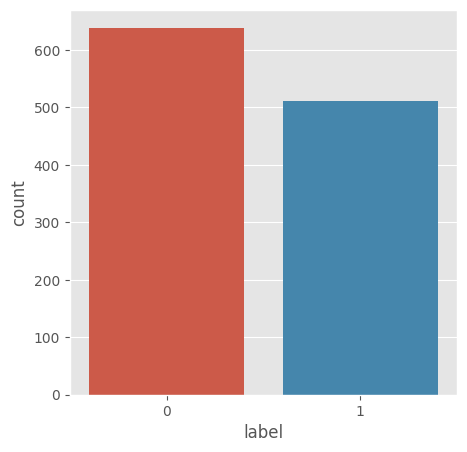

In [15]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = data)

Text(0.5, 1.0, 'Distribution of sentiments')

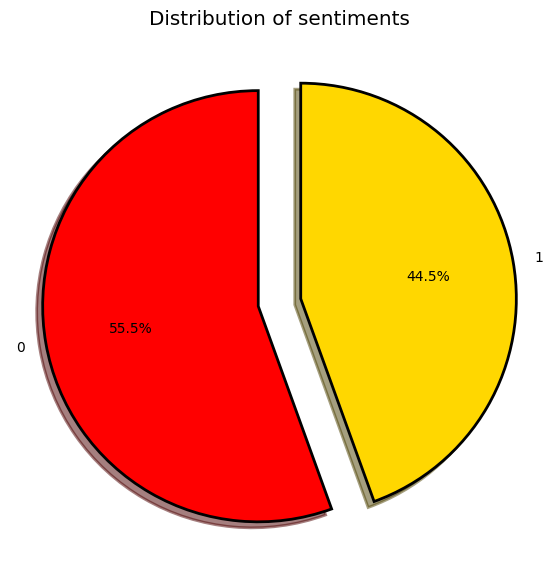

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [17]:
non_depressed = data[data.label == 0]
non_depressed.head()

,text,label
1,samata suba dawasak wewa,0
3,raata dilisena luminious paata tharu tikak kaa...,0
5,mageth thiyenawa maru ne,0
6,ow kochchara hoda karath dakinne na anith aram...,0
7,uthsahaya na nagitinna nagitinna pahalatama wa...,0


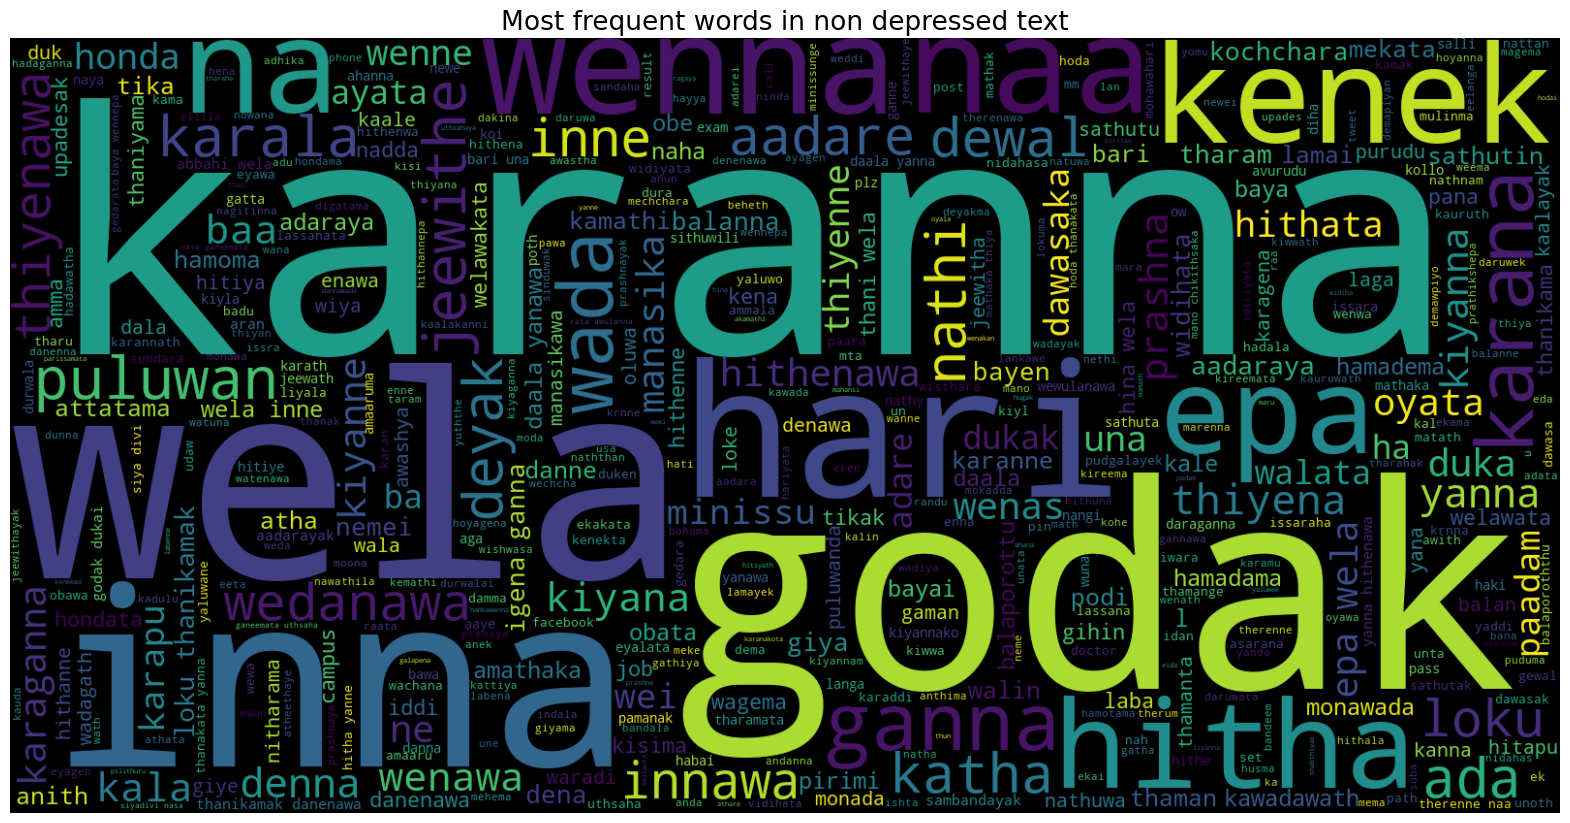

In [18]:
text = ' '.join([word for word in non_depressed['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non depressed text', fontsize = 19)
plt.show()

In [16]:
# extract the words and their frequencies from the WordCloud object
words = wordcloud.words_

# create a list of words from the dictionary
word_list = list(words.keys())

# print the list of words
print(word_list)

# print each word from the list
for word in word_list:
    print(word)

['karanna', 'godak', 'wela', 'inna', 'hari', 'wenna', 'naa', 'kenek', 'na', 'epa', 'hitha', 'ganna', 'karana', 'wada', 'puluwan', 'jeewithe', 'karala', 'nathi', 'ada', 'deyak', 'katha', 'dewal', 'inne', 'aadare', 'loku', 'wedanawa', 'thiyenawa', 'innawa', 'thiyena', 'yanna', 'denna', 'kala', 'baa', 'wenawa', 'kiyana', 'prashna', 'kiyanne', 'kiyanna', 'ne', 'wenas', 'hithenawa', 'karaganna', 'manasika', 'oyata', 'duka', 'epa wela', 'wenne', 'hithata', 'una', 'thiyenne', 'honda', 'wei', 'minissu', 'karapu', 'dawasaka', 'paadam', 'dukak', 'ayata', 'ba', 'adare', 'walata', 'ha', 'aadaraya', 'loku thanikamak', 'kochchara', 'widihata', 'giya', 'bayen', 'balanna', 'nemei', 'dena', 'tharam', 'igena ganna', 'anith', 'lamai', 'danne', 'bari', 'sathutin', 'hamoma', 'karanne', 'kamathi', 'thaman', 'atha', 'podi', 'mekata', 'walin', 'tika', 'attatama', 'l', 'naha', 'kawadawath', 'amathaka', 'hamadama', 'obata', 'baya', 'kale', 'bayai', 'hamadema', 'pirimi', 'adaraya', 'monawada', 'obe', 'daala', 'b

In [19]:
depressed = data[data.label == 1]
depressed.head()

,text,label
0,nati bari kam aga higa kam mada jeewath wenawa...,1
2,hamadema athaharala giyanam hari,1
4,manasika gataluwak thiyenawa katha krnna puluw...,1
8,hamawelema kawruth naha thani wela hithenawa,1
10,hamotama witharak waradhikaraya wenawa hamadam...,1


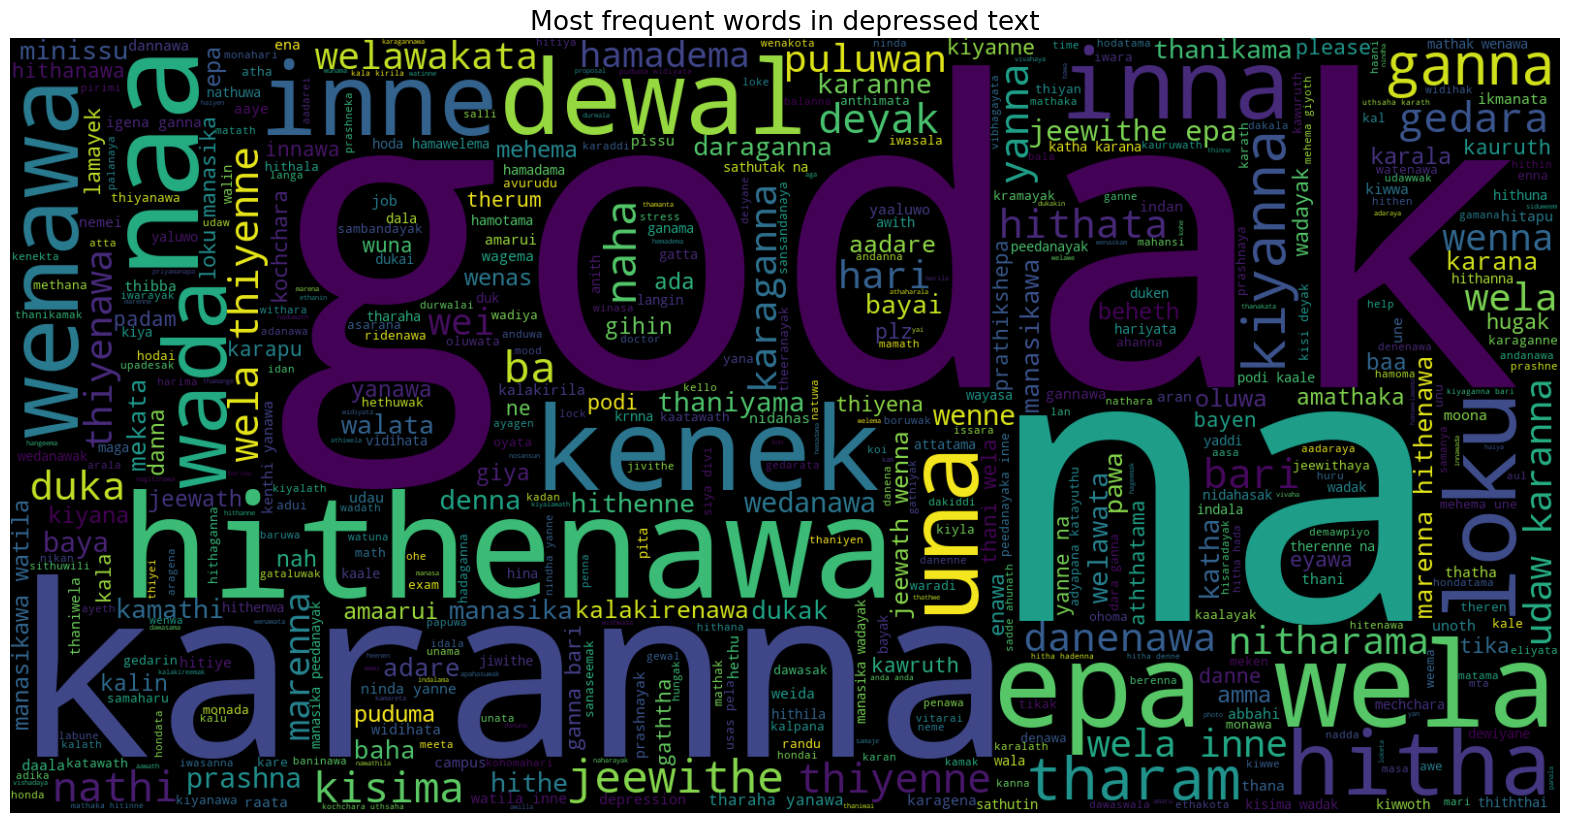

In [20]:
text = ' '.join([word for word in depressed['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in depressed text', fontsize = 19)
plt.show()

In [19]:
# extract the words and their frequencies from the WordCloud object
words = wordcloud.words_

# create a list of words from the dictionary
word_list = list(words.keys())

# print the list of words
print(word_list)

# print each word from the list
for word in word_list:
    print(word)

['godak', 'na', 'karanna', 'hithenawa', 'naa', 'epa wela', 'kenek', 'dewal', 'inne', 'wenawa', 'una', 'inna', 'loku', 'hitha', 'wada', 'tharam', 'kiyanna', 'ganna', 'jeewithe', 'naha', 'ba', 'kisima', 'gedara', 'nathi', 'bari', 'yanna', 'thiyenne', 'deyak', 'wela thiyenne', 'duka', 'hithata', 'danenawa', 'hari', 'puluwan', 'wela', 'karaganna', 'thiyenawa', 'welawakata', 'nitharama', 'udaw karanna', 'wela inne', 'wenna', 'wei', 'hamadema', 'marenna', 'jeewithe epa', 'prashna', 'baya', 'wenne', 'wedanawa', 'katha', 'thaniyama', 'karanne', 'welawata', 'denna', 'manasika', 'kamathi', 'minissu', 'walata', 'thanikama', 'hithenne', 'hithe', 'daraganna', 'bayai', 'pawa', 'dukak', 'manasikawa', 'karana', 'adare', 'mekata', 'baha', 'marenna hithenawa', 'oluwa', 'kalakirenawa', 'aadare', 'jeewath wenna', 'kiyana', 'epa', 'karala', 'puduma', 'mehema', 'wenas', 'beheth', 'amma', 'amaarui', 'manasikawa watila', 'jeewath', 'yanawa', 'gihin', 'kalin', 'giya', 'baa', 'amathaka', 'danna', 'ada', 'nah', 

## Feature extraction

In [21]:
vect = TfidfVectorizer(ngram_range = (1,5), min_df = 3, analyzer = 'char_wb').fit(data['text'])

In [22]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))

Number of features: 8015



## Model Building and Training

In [23]:
X = data['text']
Y = data['label']
X = vect.transform(X)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (919, 8015)
Size of y_train: (919,)
Size of x_test:  (230, 8015)
Size of y_test:  (230,)


In [26]:
def evaluate_classifier(yTest, predict):
    acc = accuracy_score(predict, yTest)
    print("Test accuarcy: {:.2f}%".format(acc*100))
    print(confusion_matrix(yTest, predict))
    print("\n")
    print(classification_report(yTest, predict))

In [27]:
logreg = LogisticRegression(max_iter=10, penalty='l2', random_state=8, solver='liblinear')
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 74.35%


In [140]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[116  26]
 [ 35  53]]


              precision    recall  f1-score   support

           0       0.77      0.82      0.79       142
           1       0.67      0.60      0.63        88

    accuracy                           0.73       230
   macro avg       0.72      0.71      0.71       230
weighted avg       0.73      0.73      0.73       230



In [25]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.72
Best parameters:  {'C': 10, 'solver': 'newton-cg'}


In [26]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Test accuracy: 73.04%
[[109  33]
 [ 29  59]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       142
           1       0.64      0.67      0.66        88

    accuracy                           0.73       230
   macro avg       0.72      0.72      0.72       230
weighted avg       0.73      0.73      0.73       230



In [29]:
svm = SVC(C=1, kernel='rbf', probability=True)
svm.fit(x_train, y_train)
svm_predict = svm.predict(x_test)
svm_acc = accuracy_score(svm_predict, y_test)

In [30]:
print("Test accuarcy: {:.2f}%".format(svm_acc*100))
print(confusion_matrix(y_test, svm_predict))
print("\n")
print(classification_report(y_test, svm_predict))

Test accuarcy: 75.65%
[[119  20]
 [ 36  55]]


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       139
           1       0.73      0.60      0.66        91

    accuracy                           0.76       230
   macro avg       0.75      0.73      0.74       230
weighted avg       0.75      0.76      0.75       230



In [29]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    # 'degree': [1, 3, 5, 7, 9]
}

grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy', cv = 5, n_jobs = -1, refit = True, verbose = 2)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Cross validation score: 0.74
Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [30]:
grid_predictions = grid.predict(x_test)
grid_acc = accuracy_score(grid_predictions, y_test)
print("Test accuarcy: {:.2f}%".format(grid_acc*100))
print(confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Test accuarcy: 74.35%
[[113  29]
 [ 30  58]]


              precision    recall  f1-score   support

           0       0.79      0.80      0.79       142
           1       0.67      0.66      0.66        88

    accuracy                           0.74       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.74      0.74      0.74       230



In [33]:
mnb = MultinomialNB(alpha=0.9)
mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_predict, y_test)

In [34]:
print("Test accuarcy: {:.2f}%".format(mnb_acc*100))
print(confusion_matrix(y_test, mnb_predict))
print("\n")
print(classification_report(y_test, mnb_predict))

Test accuarcy: 73.48%
[[108  31]
 [ 30  61]]


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.66      0.67      0.67        91

    accuracy                           0.73       230
   macro avg       0.72      0.72      0.72       230
weighted avg       0.74      0.73      0.74       230



In [376]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)
evaluate_classifier(y_test, dt_predict)

Test accuarcy: 68.26%
[[102  40]
 [ 33  55]]


              precision    recall  f1-score   support

           0       0.76      0.72      0.74       142
           1       0.58      0.62      0.60        88

    accuracy                           0.68       230
   macro avg       0.67      0.67      0.67       230
weighted avg       0.69      0.68      0.68       230



In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
evaluate_classifier(y_test, rf_predict)

Test accuarcy: 72.61%
[[110  29]
 [ 34  57]]


              precision    recall  f1-score   support

           0       0.76      0.79      0.78       139
           1       0.66      0.63      0.64        91

    accuracy                           0.73       230
   macro avg       0.71      0.71      0.71       230
weighted avg       0.72      0.73      0.72       230



In [379]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
evaluate_classifier(y_test, knn_predict)

Test accuarcy: 63.48%
[[140   2]
 [ 82   6]]


              precision    recall  f1-score   support

           0       0.63      0.99      0.77       142
           1       0.75      0.07      0.12        88

    accuracy                           0.63       230
   macro avg       0.69      0.53      0.45       230
weighted avg       0.68      0.63      0.52       230



In [381]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(x_train, y_train)
sgd_predict = sgd.predict(x_test)
evaluate_classifier(y_test, sgd_predict)

Test accuarcy: 62.61%
[[96 46]
 [40 48]]


              precision    recall  f1-score   support

           0       0.71      0.68      0.69       142
           1       0.51      0.55      0.53        88

    accuracy                           0.63       230
   macro avg       0.61      0.61      0.61       230
weighted avg       0.63      0.63      0.63       230



In [347]:
pac = PassiveAggressiveClassifier()
pac.fit(x_train, y_train)
pac_predict = pac.predict(x_test)
evaluate_classifier(y_test, pac_predict)

Test accuarcy: 56.96%
[[84 58]
 [41 47]]


              precision    recall  f1-score   support

           0       0.67      0.59      0.63       142
           1       0.45      0.53      0.49        88

    accuracy                           0.57       230
   macro avg       0.56      0.56      0.56       230
weighted avg       0.59      0.57      0.57       230



In [350]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abc_predict = abc.predict(x_test)
evaluate_classifier(y_test, abc_predict)

Test accuarcy: 70.00%
[[109  33]
 [ 36  52]]


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       142
           1       0.61      0.59      0.60        88

    accuracy                           0.70       230
   macro avg       0.68      0.68      0.68       230
weighted avg       0.70      0.70      0.70       230



In [354]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_predict = gbc.predict(x_test)
evaluate_classifier(y_test, gbc_predict)

Test accuarcy: 71.74%
[[115  27]
 [ 38  50]]


              precision    recall  f1-score   support

           0       0.75      0.81      0.78       142
           1       0.65      0.57      0.61        88

    accuracy                           0.72       230
   macro avg       0.70      0.69      0.69       230
weighted avg       0.71      0.72      0.71       230



In [33]:
etc = ExtraTreesClassifier(max_features='log2', n_estimators=200)
etc.fit(x_train, y_train)
etc_predict = etc.predict(x_test)
evaluate_classifier(y_test, etc_predict)

Test accuarcy: 77.39%
[[122  17]
 [ 35  56]]


              precision    recall  f1-score   support

           0       0.78      0.88      0.82       139
           1       0.77      0.62      0.68        91

    accuracy                           0.77       230
   macro avg       0.77      0.75      0.75       230
weighted avg       0.77      0.77      0.77       230



In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv = 5, n_jobs = -1, refit = True, verbose = 2)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Cross validation score: 0.72
Best parameters:  {'max_features': 'sqrt', 'n_estimators': 1000}


In [32]:
grid_predictions = grid.predict(x_test)
grid_acc = accuracy_score(grid_predictions, y_test)
print("Test accuarcy: {:.2f}%".format(grid_acc*100))
print(confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Test accuarcy: 73.04%
[[111  28]
 [ 34  57]]


              precision    recall  f1-score   support

           0       0.77      0.80      0.78       139
           1       0.67      0.63      0.65        91

    accuracy                           0.73       230
   macro avg       0.72      0.71      0.71       230
weighted avg       0.73      0.73      0.73       230



In [34]:
#voting classifier
clf1 = MultinomialNB(alpha=0.9)
clf2 = LogisticRegression(max_iter=10, penalty='l2', random_state=8, solver='liblinear')
clf3 = SVC(C=1, kernel='rbf', probability=True)
clf4 = ExtraTreesClassifier(max_features='log2', n_estimators=200)

eclf = VotingClassifier(estimators=[('mnb', clf1), ('lr', clf2), ('svm', clf3), ('etc', clf4)], voting='hard')
eclf.fit(x_train, y_train)
eclf_predict = eclf.predict(x_test)
evaluate_classifier(y_test, eclf_predict)

Test accuarcy: 74.35%
[[121  18]
 [ 41  50]]


              precision    recall  f1-score   support

           0       0.75      0.87      0.80       139
           1       0.74      0.55      0.63        91

    accuracy                           0.74       230
   macro avg       0.74      0.71      0.72       230
weighted avg       0.74      0.74      0.73       230



In [30]:
#stacking classifier
estimators = [
    ('mnb', MultinomialNB(alpha=0.9)),
    ('svm', SVC(C=1, kernel='rbf', probability=True)),
    ('etc', ExtraTreesClassifier(max_features='log2', n_estimators=200)),
    # ('rf', RandomForestClassifier())
    
]
final_estimator = LogisticRegression(max_iter=10, penalty='l2', random_state=8, solver='liblinear')

sclf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
sclf.fit(x_train, y_train)
sclf_predict = sclf.predict(x_test)
evaluate_classifier(y_test, sclf_predict)

Test accuarcy: 76.52%
[[115  24]
 [ 30  61]]


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       139
           1       0.72      0.67      0.69        91

    accuracy                           0.77       230
   macro avg       0.76      0.75      0.75       230
weighted avg       0.76      0.77      0.76       230



## Evaluation

Test accuarcy: 76.52%


,precision,recall,f1-score,support
0,0.793333,0.838028,0.815068,142.000000
1,0.712500,0.647727,0.678571,88.000000
accuracy,0.765217,0.765217,0.765217,0.765217
macro avg,0.752917,0.742878,0.746820,230.000000
weighted avg,0.762406,0.765217,0.762844,230.000000


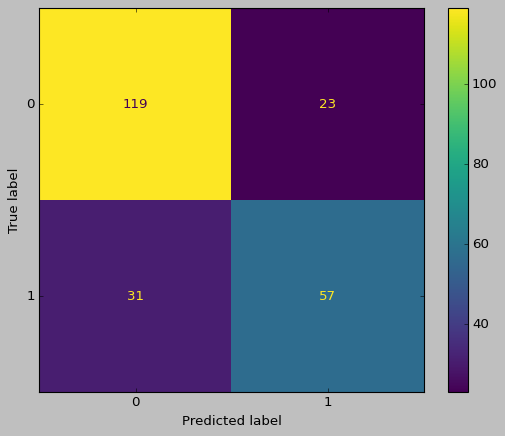

In [34]:
# display test accuracy
eclf_acc = accuracy_score(eclf_predict, y_test)
print("Test accuarcy: {:.2f}%".format(eclf_acc*100))

# plot confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, eclf_predict, labels=eclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=eclf.classes_)
disp.plot()

# display classification report table
report = classification_report(y_test, eclf_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.head()


# Main Application

In [ ]:
def preprocess_text(final_stop_words, text):
    
    # removal of capitalization
    text = text.lower()
    # remove numbers
    text = re.sub(r"\d+", "", str(text))
    # remove url
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    # remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # remove emojis
    text = emoji.replace_emoji(text, replace='')
    # remove re-tweets status
    text = re.sub(r'^RT @\w*: ', ' ', text)
    # remove mentions
    text = re.sub(r'@\w*', ' ', text)
    # remove special characters
    text = re.sub(r'[!@#&*$.?,]', ' ', text)
    # remove \n
    text = re.sub(r'\n', ' ', text)
    # remove ''
    text = re.sub("'", '', text)
    
    # tokenizing the text and removing stop words
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in final_stop_words]
    preprocessed_text = " ".join(filtered_text)
    
    return preprocessed_text

def extract_features(vectorizer, preprocessed_text):
    vectorized_text = vectorizer.transform([preprocessed_text])
    return vectorized_text

def classify_text(classifier_model, vectorizer, final_stop_words, text):
    
    # pre-process the text
    preprocessed_text = preprocess_text(final_stop_words, text)
    
    # Convert the text into numerical features
    text_features = extract_features(vectorizer, preprocessed_text)
    
    # Predict the depression status of the text
    pred_value = classifier_model.predict(text_features)
    
    # calculating prediction percentage
    probas = [c.predict_proba(text_features) for c in classifier_model.estimators_]
    avg_proba = np.average(probas, axis=0, weights=[0.33, 0.33, 0.34])
    percentage = np.max(avg_proba, axis = 1)
    
    return pred_value[0], percentage[0]

def display_results(prediction, percentage):
    if prediction == 1:
        print("The author of this text might be suffering from depression")
        print("Depression rate: {:.2f}%".format(percentage*100))
    else:
        print("The author of this text is not suffering from depression")

In [ ]:
# loading the classifier and the vectorizer
loaded_voting_clf = joblib.load('voting_classifier.joblib')
loaded_vectorizer = joblib.load('vectorizer.joblib')

# loading the stopwords list
final_stop_words = []
with open("final_stop_words.txt", "r") as f:
    for line in f:
        final_stop_words.append(line.strip())
        
# Ask the user to input Singlish text
text = input("Enter the Singlish text: ")
        
# classifying the text and displaying the results
prediction, percentage = classify_text(loaded_voting_clf, loaded_vectorizer, final_stop_words, text)
display_results(prediction, percentage)